In [1]:
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
#각 이미지는 28*28, 회색 스케일(0-255)

In [5]:
X_train = X_train/255.0  #(0-255) --> (0.0-1.0)

In [6]:
X_test = X_test/255.0

# MLP

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [14]:
#모델 컴파일 : 손실 함수, 최적화 알고리즘, 지표
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 19s 10ms/step - loss: 2.2356 - accuracy: 0.2883 - val_loss: 2.2215 - val_accuracy: 0.3143
Epoch 2/10
1688/1688 [==============================] - 18s 10ms/step - loss: 2.1989 - accuracy: 0.3048 - val_loss: 2.1745 - val_accuracy: 0.3240
Epoch 3/10
1688/1688 [==============================] - 17s 10ms/step - loss: 2.1363 - accuracy: 0.3177 - val_loss: 2.0967 - val_accuracy: 0.2845
Epoch 4/10
1688/1688 [==============================] - 15s 9ms/step - loss: 2.0402 - accuracy: 0.3218 - val_loss: 1.9854 - val_accuracy: 0.2975
Epoch 5/10
1688/1688 [==============================] - 14s 8ms/step - loss: 1.9224 - accuracy: 0.3452 - val_loss: 1.8671 - val_accuracy: 0.3227
Epoch 6/10
1688/1688 [==============================] - 13s 8ms/step - loss: 1.8113 - accuracy: 0.3855 - val_loss: 1.7685 - val_accuracy: 0.4335
Epoch 7/10
1688/1688 [==============================] - 17s 10ms/step - loss: 1.7164 - accuracy: 0.4157 - val_loss: 1.6732 - va

In [16]:
import pandas as pd

<AxesSubplot:>

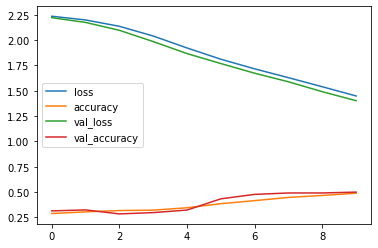

In [17]:
pd.DataFrame(history.history).plot()

In [18]:
model.predict(X_test[:3])

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.7354910e-34, 0.0000000e+00, 5.7974789e-23,
        3.1481073e-29, 1.0000000e+00],
       [2.3449515e-38, 0.0000000e+00, 1.5578051e-04, 0.0000000e+00,
        9.9984419e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.8918283e-28,
        2.3503701e-29, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [19]:
import numpy as np

In [21]:
np.argmax(model.predict(X_test[:3]), axis=1)

array([9, 4, 0], dtype=int64)

In [22]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 44.3711 - accuracy: 0.2470


[44.37112045288086, 0.24699999392032623]

In [24]:
p=np.argmax(model.predict(X_test),axis=1)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test, p)

array([[710,   0,   1,   0, 287,   0,   0,   0,   0,   2],
       [973,   0,   1,   0,  26,   0,   0,   0,   0,   0],
       [ 18,   0,   6,   0, 976,   0,   0,   0,   0,   0],
       [891,   0,   1,   0, 108,   0,   0,   0,   0,   0],
       [104,   0,   0,   0, 896,   0,   0,   0,   0,   0],
       [  0,   0,  51,   0,  11,   0,   0,   3, 101, 834],
       [230,   0,  15,   0, 754,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,  34,   3, 963],
       [ 16,   0, 387,   0, 398,   0,   0,   0, 146,  53],
       [  0,   0, 122,   0,  24,   0,   0,   0, 176, 678]], dtype=int64)

# tensorflow

In [27]:
# 텐서플로 데이터 셋 객체
ds = tf.data.Dataset.from_tensor_slices(np.arange(5))

In [28]:
ds

<TensorSliceDataset shapes: (), types: tf.int32>

In [30]:
for ex in ds:
    print(ex)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [31]:
#신경망 입력 : 특성행렬, 레이블 백터
X = tf.data.Dataset.from_tensor_slices([[1,2,3],[4,5,6],[7,8,9]])

In [32]:
y = tf.data.Dataset.from_tensor_slices([0,1,1])

In [33]:
my_dataset = tf.data.Dataset.zip((X,y))

In [34]:
for ex in my_dataset:
    print(ex)

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([4, 5, 6])>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([7, 8, 9])>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
